In [11]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/news/news.csv')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the lemmatization function
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in str(text).split()])

# Apply the lemmatization function to the 'text' feature
df['text'] = df['text'].apply(lemmatize_text)


In [3]:

# Define the pipeline for logistic regression
lr_pipeline = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('lr', LogisticRegression(random_state=42))])

# Define the pipeline for decision tree
dt_pipeline = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('dt', DecisionTreeClassifier(random_state=42))])

# Define the pipeline for KNN
knn_pipeline = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('knn', KNeighborsClassifier())])

# Initialize the individual models
model1 = lr_pipeline
model2 = dt_pipeline
model3 = knn_pipeline

# Initialize the voting classifier
voting_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('knn', model3)], voting='hard')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = voting_model.predict(X_test)


-------********--------
Accuracy: 0.8871349644830308
-------********--------


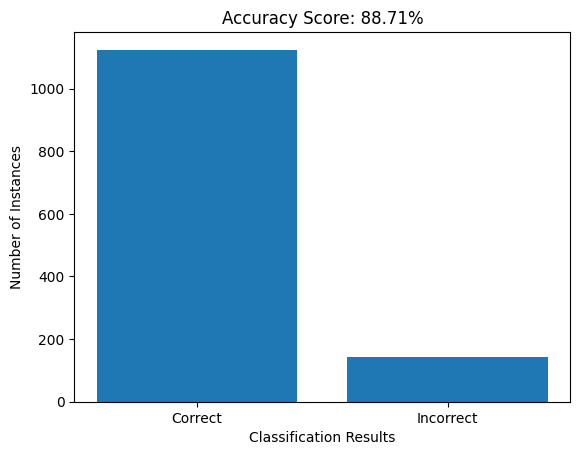

In [25]:
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)


# calculate the number of correctly and incorrectly classified instances
correct = sum(y_test == y_pred)
incorrect = sum(y_test != y_pred)
# plot the bar chart
plt.bar(['Correct', 'Incorrect'], [correct, incorrect])
plt.title('Accuracy Score: {:.2f}%'.format(accuracy * 100))
plt.xlabel('Classification Results')
plt.ylabel('Number of Instances')

print("-------********--------")
print('Accuracy:', accuracy)
print("-------********--------")
plt.show()

-------********--------
confusion_matrix :
[[598  30]
 [113 526]]
-------********--------


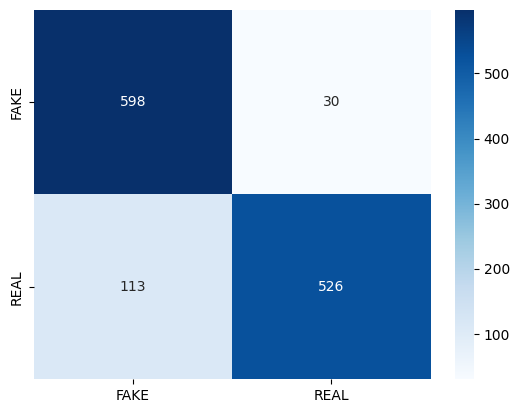

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
#cm = confusion_matrix(y_test['label'], y_pred, labels = ['FAKE', 'REAL'])
cm = confusion_matrix(y_test, y_pred)
# print the confusion matrix

print("-------********--------")
print('confusion_matrix :')
print(cm)
print("-------********--------")



# plot the confusion matrix as a heatmap
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
sns.heatmap(cm,fmt='d', annot=True, cmap = 'Blues', xticklabels = ['FAKE', 'REAL'], yticklabels = ['FAKE', 'REAL'])
plt.show()